In [1]:
# ----- LIBS

# geoprocessamento
import geopandas as gpd
from shapely.geometry import Polygon

# normalizar
import numpy as np
from shapely.geometry import mapping
from sklearn.preprocessing import MinMaxScaler

# plots
import matplotlib.pyplot as plt

# gerar e visualizar csv
import csv
import pandas as pd

# Extração de shapes e Plots

- Extração de região geográfica de interesse (bbbike) no formato .shp
- Plot de shapes

In [2]:
# ----- READ BUILDING SHAPES DATASET

# use bbbike to obtain shape files
# bbbike: https://extract.bbbike.org/

# Unicamp Shapes:
# landuse
# natural
# places
# points
# railways
# roads
# waterways
# buildings

unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')

print('shape:', unicamp_df.shape)
unicamp_df.head()

shape: (509, 4)


,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


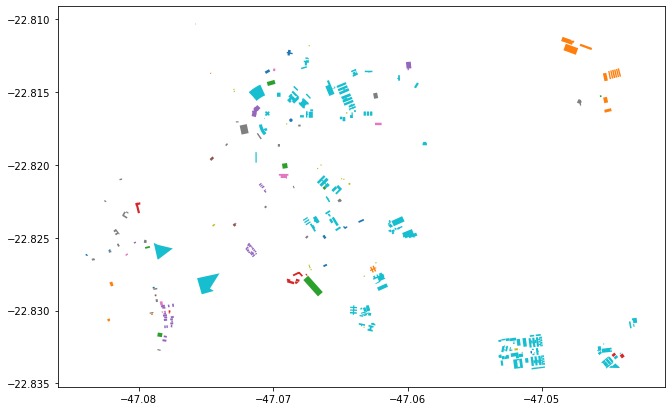

In [3]:
# ----- PLOT UNICAMP MAP PER BUILDING TYPE

# https://geopandas.org/gallery/choro_legends.html
# ax = unicamp_df.plot("type", figsize=(12, 4), legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1.02,0.5)})

ax = unicamp_df.plot("type",
                     figsize=(15, 7),
                     legend=False,
                     legend_kwds={
                     'loc': 'center left',
                     'bbox_to_anchor':(1.02,0.5)
                     })

In [4]:
# ----- CHECK BUILDING SHAPES DATASET CRS

# crs - sistema referência de coordenadas

# WGS 84 - sistema de coords mundial (degree)
unicamp_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

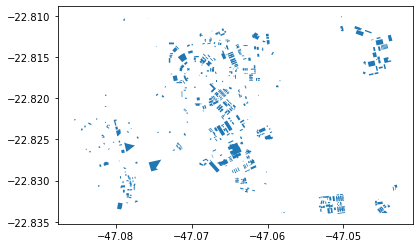

In [5]:
# ----- Plot UNICAMP MAPA (WGS84)
ax = unicamp_df.plot(figsize=(12, 4))

,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."


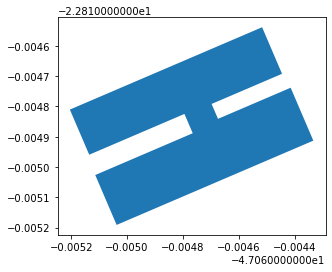

In [6]:
# ----- PLOT IC BUILDING (WGS84)
ic_predio = unicamp_df.query('osm_id == 95011169')
ax = ic_predio.plot()
ic_predio.head()

# Conversão de CRS

Conversão de CRS WGS 84 para SIRGAS 2000 / UTM zone 23S , que é dado em metros e representa o sistemas de georeferência das Américas.

Características:

- Datum: SIRGAS 2000
- Projeção: UTM zone 23S (Campinas/SP)
- América Latina
- Hemisfério sul. 

Referências:
- https://epsg.io/31981
- https://spatialreference.org/ref/?search=31981
- https://pt.slideshare.net/JorgeSantos30/20141011-qgis24-sistemadereferenciadecoordenadas
- https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
- https://cursos.alura.com.br/forum/topico-erro-ao-reprojetar-usando-a-funcao-to_crs-77139


In [7]:
# Geodataframe dos Prédios da Unicamp
unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')
unicamp_df.head()

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [8]:
# Conversão de WSG84 para SIRGAS 2000 / UTM one 23S : 31983 
# Zona 23 inclui Campinas

unicamp_utm_df = unicamp_df.to_crs(31983)
unicamp_utm_df.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 48°W to 42°W
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((288179.970 7475626.000, 288182.081 7..."
1,95011157,Banco Santander,bank,"POLYGON ((287668.651 7475263.188, 287667.599 7..."
2,95011161,Ciclo Básico II,university,"POLYGON ((287476.147 7475140.737, 287495.256 7..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((288034.700 7475498.723, 288104.976 7..."
4,95011172,IC 3.5,university,"POLYGON ((288134.073 7475638.141, 288139.036 7..."
5,95011175,DAC - Diretoria Acadêmica do Campus,university,"POLYGON ((287471.903 7475188.530, 287494.612 7..."
6,95463718,Restaurante Universitário,restaurant,"POLYGON ((287305.221 7475143.279, 287359.092 7..."
7,95463720,GMU - Ginásio Multidisciplinar,university,"POLYGON ((287355.264 7475465.824, 287386.481 7..."
8,95463721,None,None,"POLYGON ((287728.526 7475472.273, 287759.847 7..."
9,95463722,Instituto de Filosofia e Ciencias Humanas,university,"POLYGON ((287742.863 7475434.026, 287693.507 7..."


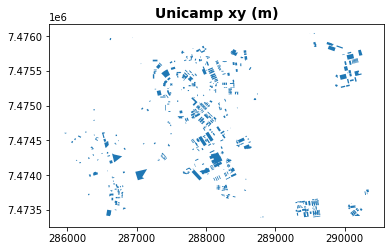

In [9]:
# Plot de mapa Convertido para SIRGAS 2000 / UTM zone 23S
ax = unicamp_utm_df.plot()
plt.title('Unicamp xy (m)',fontweight='bold',fontsize=14)

# Dataframe convertido
unicamp_utm_df.head(10)

In [10]:
unicamp_utm_df['centroids'] = unicamp_utm_df.centroid
unicamp_utm_df['centroids']

0      POINT (288164.757 7475614.484)
1      POINT (287680.703 7475257.946)
2      POINT (287463.109 7475182.762)
3      POINT (288079.758 7475493.426)
4      POINT (288158.099 7475640.063)
                    ...              
504    POINT (288473.227 7474421.359)
505    POINT (288491.927 7474443.209)
506    POINT (286688.852 7474451.339)
507    POINT (286696.551 7474453.636)
508    POINT (289447.856 7473449.118)
Name: centroids, Length: 509, dtype: geometry

In [11]:
unicamp_utm_df.head()

,osm_id,name,type,geometry,centroids
0,95011154,IC 3,university,"POLYGON ((288179.970 7475626.000, 288182.081 7...",POINT (288164.757 7475614.484)
1,95011157,Banco Santander,bank,"POLYGON ((287668.651 7475263.188, 287667.599 7...",POINT (287680.703 7475257.946)
2,95011161,Ciclo Básico II,university,"POLYGON ((287476.147 7475140.737, 287495.256 7...",POINT (287463.109 7475182.762)
3,95011169,IC - Instituto de Computação,university,"POLYGON ((288034.700 7475498.723, 288104.976 7...",POINT (288079.758 7475493.426)
4,95011172,IC 3.5,university,"POLYGON ((288134.073 7475638.141, 288139.036 7...",POINT (288158.099 7475640.063)


# Normalização de Mapa da Unicamp

In [12]:
# Bounds of Unicamp Map
unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy = unicamp_utm_df.geometry.total_bounds

print('bounds:', unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
print('x:', unicamp_maxx-unicamp_minx)
print('y:', unicamp_maxy- unicamp_miny)


bounds: 285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
x: 4387.848261102627
y: 2661.465870924294


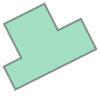

In [13]:
# get all geometries of unicamp_utm_df
unicamp_geometries = [i for i in unicamp_utm_df.geometry]

# geometry example
unicamp_geometries[0]

In [14]:
map_minx = 1e+10
map_maxx = -1
map_miny = 1e+10
map_maxy = -1

for geometry in range(len(unicamp_geometries)):
    
    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 

    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    
    # get all geometry coords in x and y
    if geometry == 0:
        all_coords_x = x_coords.copy()
        all_coords_y = y_coords.copy()
    else:
        all_coords_x = np.append (all_coords_x, x_coords.copy(), axis=0)
        all_coords_y = np.append (all_coords_y, y_coords.copy(), axis=0)
        
    # get bounds limits of map and compare with unicamp_utm_df.geometry.total_bounds
    # after for loop, limits must be equal
    if np.min(x_coords) < map_minx:
        map_minx = np.min(x_coords)
    if np.max(x_coords) > map_maxx:
        map_maxx = np.max(x_coords)
    
    if np.min(y_coords) < map_miny:
        map_miny = np.min(y_coords)
    if np.max(y_coords) > map_maxy:
        map_maxy = np.max(y_coords)
    

# after for loop, limits must be equal
print(map_minx, map_miny,map_maxx, map_maxy)
print(unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
# yey

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968


In [15]:
# Teste de funcionamento da lógica de normalização
# teste com uma das geometrias (predios)

# for geometry in range(len(unicamp_geometries)):

#     # get all coordinates (x,y) of polygons in unicamp_utm_df
#     all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 
    
#     # split all coordinates per geometry and get x coords and y coords
#     x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
#     y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
#     # convert to 2D array
#     x_coords = np.array(x_coords).reshape(-1, 1) 
#     y_coords = np.array(y_coords).reshape(-1, 1)
    
#     # define limits of normalization
#     scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
#     scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))
    
#     # normalize with all all geometry coords x 
#     scaler_x.fit(x)
#     transform_x = scaler_x.transform(x_coords)
    
#     # normalize with all all geometry coords y
#     scaler_y.fit(y)
#     transform_y = scaler_y.transform(y_coords)
    
#     # convert np array x and y to polygon
#     newArray = np.append (transform_x, transform_y, axis=1)
#     new_polygon = Polygon(newArray)
#     print('Rescale polygon:\n\n', new_polygon)
#     break

    
# # check building bounds    
# building = gpd.GeoSeries(new_polygon)
# building.plot(color='Green')

# a,b,c,d = building.total_bounds
# print('\nx:',c-a, 'm')
# print('y:',d-b, 'm')

In [16]:
# create a normalized map with unicamp bounds

# criando novo mapa, que conterá geometrias normalizadas
mapa_normalizado = gpd.GeoDataFrame(columns=["geometry"])
mapa_normalizado['osm_id'] = unicamp_utm_df['osm_id']
mapa_normalizado['name'] = unicamp_utm_df['name']
mapa_normalizado['type'] = unicamp_utm_df['type']

# processo de normalização
for geometry in range(len(unicamp_geometries)):

    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 
    
    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords).reshape(-1, 1) 
    y_coords = np.array(y_coords).reshape(-1, 1)
    
    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))
    
    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)
    
    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)
    
    # convert np array x and y normalized back to polygon
    building_geometry = np.append (transform_x, transform_y, axis=1)
    new_polygon = Polygon(building_geometry)
    
    mapa_normalizado.loc[geometry, 'geometry'] = new_polygon
    

print('Shape do Mapa normalizado:', mapa_normalizado.shape)
mapa_normalizado.head()

Shape do Mapa normalizado: (509, 4)


,geometry,osm_id,name,type
0,"POLYGON ((2219.251 2238.728, 2221.362 2239.787...",95011154,IC 3,university
1,"POLYGON ((1707.932 1875.916, 1706.879 1871.880...",95011157,Banco Santander,bank
2,"POLYGON ((1515.427 1753.464, 1534.537 1769.617...",95011161,Ciclo Básico II,university
3,"POLYGON ((2073.981 2111.450, 2144.257 2142.551...",95011169,IC - Instituto de Computação,university
4,"POLYGON ((2173.354 2250.869, 2178.317 2240.382...",95011172,IC 3.5,university


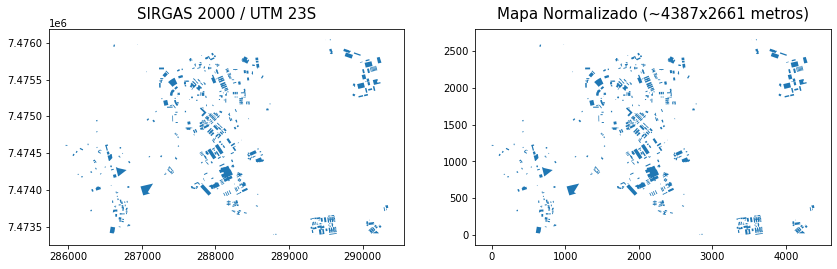

In [17]:
# ANTES E DEPOIS DA NORMALIZAÇÃO

fig, axes = plt.subplots(1,2, figsize = (14, 7)) # 1 linha, 2 colunas

# Mapa da unicamp no crs SIRGAS 2000/ UTM 23S
axes[0].set_title('SIRGAS 2000 / UTM 23S', fontsize=15, y=1.02)
unicamp_utm_df.plot(ax=axes[0])

# Mapa da Unicamp
# onde:
# - unicamp bounds = 285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
# - maxx - minx    = 4387.848261102627
# - maxy - miny    = 2661.465870924294
axes[1].set_title('Mapa Normalizado (~4387x2661 metros)', fontsize=15, y=1.02)
mapa_normalizado.plot(ax=axes[1])

plt.show()

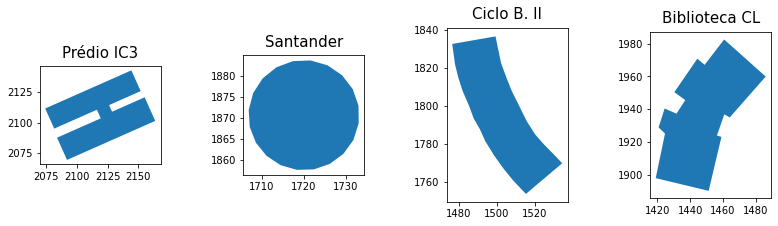

In [18]:
# EXEMPLO DE PRÉDIOS NORMALIZADOS

# get buildings
ic_predio = mapa_normalizado.query('osm_id == 95011169')
santander = mapa_normalizado.query('osm_id == 95011157')
cbII_predio = mapa_normalizado.query('osm_id == 95011161')
biblioteca = mapa_normalizado.query('osm_id == 95463723')

# plot buildings
fig, axes = plt.subplots(1,4, figsize = (12, 5)) # 2 linha, 2 colunas

# Mapa da unicamp no crs SIRGAS 2000/ UTM 23S
axes[0].set_title('Prédio IC3', fontsize=15, y=1.02)
ic_predio.plot(ax=axes[0])

axes[1].set_title('Santander', fontsize=15, y=1.02)
santander.plot(ax=axes[1])

axes[2].set_title('Ciclo B. II', fontsize=15, y=1.02)
cbII_predio.plot(ax=axes[2])

axes[3].set_title('Biblioteca CL', fontsize=15, y=1.02)
biblioteca.plot(ax=axes[3])

# space between subplots
fig.tight_layout(pad=5.0)

plt.show()

# Google Maps: https://www.google.com/maps/place/Coordenadoria+de+P%C3%B3s-gradua%C3%A7%C3%A3o+-+Instituto+de+Biologia+%2F+Unicamp/@-22.8174874,-47.069779,253m/data=!3m1!1e3!4m5!3m4!1s0x0:0x5970884374643347!8m2!3d-22.8194777!4d-47.0698417

# Create a csv file with Unicamp Building bounds

- Create a csv file with Unicamp Building bounds
- The outuput csv file will serve as input of NS3 Building Container

In [19]:
# teste precisão de casas decimais
predio = mapa_normalizado.query('osm_id == 95011154')
print('predio.total_bounds:', predio.total_bounds)
print('\npredio.bounds:', predio.bounds)
print('\npredio.bounds com LOC:', mapa_normalizado.loc[0]['geometry'].bounds) 
print('\npredio.bounds com ILOC:', mapa_normalizado.iloc[0]['geometry'].bounds) 

predio.total_bounds: [2184.99614652 2206.42428893 2228.59608988 2246.88064197]

predio.bounds:           minx         miny        maxx         maxy
0  2184.996147  2206.424289  2228.59609  2246.880642

predio.bounds com LOC: (2184.996146517573, 2206.4242889340967, 2228.596089881903, 2246.880641972646)

predio.bounds com ILOC: (2184.996146517573, 2206.4242889340967, 2228.596089881903, 2246.880641972646)


In [20]:
# get buildings_bounds
buildings_bounds = []
for i in range(len(mapa_normalizado.geometry)):
    bounds = mapa_normalizado.loc[i]['geometry'].bounds
    buildings_bounds.append(list(bounds))

print(buildings_bounds[0])
print(buildings_bounds[1])

[2184.996146517573, 2206.4242889340967, 2228.596089881903, 2246.880641972646]
[1706.8793984073563, 1857.6956350402907, 1732.9952387762605, 1883.6720692049712]


In [21]:
# GENERATE BUILDINGS CSV FILE

colunms_names  = ["minx", "miny", "maxx", "maxy"]


#---- create a csv file
def create_csv(title, colunms_names):
    with open(title,"w+") as file:
        writer = csv.writer(file, delimiter=",")
        writer.writerow(colunms_names)


#---- add row on csv file
def add_csv_rows(ns3_settings, colunms_names, title):
    for colunm in ns3_settings:
        if len(colunm) == len(colunms_names):
            with open(title,"a") as file:
                writer = csv.writer(file, delimiter=",")
                writer.writerow([float(x) for x in colunm])


output_filename = 'building_bounds.csv'
create_csv(output_filename, colunms_names)
add_csv_rows(buildings_bounds, colunms_names, output_filename)


                

In [22]:

building_bd_df = pd.read_csv("building_bounds.csv") 

print("Total rows:", len(building_bd_df))
building_bd_df.head(509)



Total rows: 509


,minx,miny,maxx,maxy
0,2184.996147,2206.424289,2228.596090,2246.880642
1,1706.879398,1857.695635,1732.995239,1883.672069
2,1476.582518,1753.464416,1534.536709,1836.472366
3,2073.980649,2069.518035,2163.675833,2142.551013
4,2173.354231,2236.447694,2219.251140,2267.950250
...,...,...,...,...
504,2499.539998,1013.990004,2526.338468,1053.112012
505,2522.389190,1045.659299,2540.005083,1065.759324
506,718.296595,1053.031265,738.036073,1074.934120
507,722.538106,1051.848954,749.294566,1081.087597


# Posicionamento dos EDs no mapa

- Mapear predios que contem coletores
    - https://www.prefeitura.unicamp.br/noticias/instalacao-de-coletores-de-pilhas-e-baterias
    - https://unicamp-arcgis.maps.arcgis.com/apps/View/index.html?appid=1d96ada62af4451bb4972b9779d09e66

- Anotar centroids de prédios mapeados

- Montar csv de posicionamento de nós

In [23]:
# RESULTADOS DO MAPEAMENTO

# ----- NÃO ENCONTRADOS POR CONSULTA DE NOME (24):

# 3. Centro de Biologia Molecular e Engenharia Genética (CBMEG) 
# 5. Centro de Computação (CCUEC) 
# 7. Centro de Estudos de Petróleo (CEPETRO) 
# 10. Ciclo Básico I 
# 17. Escola Estadual de Ensino Fundamental Físico Sérgio Pereira Porto (SERGIO PORTO)
# 29. Grupo Gestor de Obras (GGO) 
# 42. Ponto de ônibus – Rua Roxo Moreira (PO-RM)
# 43. Ponto de ônibus – Avenida Adolpho Lutz (PO-AL)
# 44. Ponto de ônibus – Rua Vital Brasil (PO-VB)
# 4. Centro de Componentes Semicondutores (CCS) # 554951142
# 6. Centro de Diagnóstico de Doenças do Aparelho Digestivo (GASTROCENTRO) # 556327645 e 556327646
# 8. Centro de Hematologia e Hemoterapia (HEMOCENTRO) # 556327636
# 9. Centro para Manutenção de Equipamentos (CEMEQ) # 556327686
# 12. Coordenadoria de Desenvolvimento Cultural (CDC) # 95463720
# 13. Diretoria Geral da Administração (DGA) # 554951141
# 15. Divisão de Educação Infantil e Complementar (DEdIC) # 537155702
# 16. Engenharia Básica (EB)  # 554951142 (ccs)
# 20. Faculdade de Enfermagem (FEnf) # 537142893
# 21. Faculdade de Engenharia Agrícola (FEAGRI) # 97592693 ~
# 23. Faculdade de Engenharia de Alimentos (FEA) # 554951120 ~
# 26. Faculdade de Engenharia Química (FEQ) # 554968138
# 28. Gabinete do Reitor (GR) # 562047779
# 34. Instituto de Estudos da Linguagem (IEL) # 556327698 ~
# 40. Instituto de Química (IQ) # 96493946



# ----- NÃO ESTÃO NO MAPA (DADOS FALTANTES):

# 3. Centro de Biologia Molecular e Engenharia Genética (CBMEG) 
# 5. Centro de Computação (CCUEC) 
# 7. Centro de Estudos de Petróleo (CEPETRO) 
# 10. Ciclo Básico I 
# 17. Escola Estadual de Ensino Fundamental Físico Sérgio Pereira Porto (SERGIO PORTO)
# 29. Grupo Gestor de Obras (GGO) 

# Casos especiais:
# 42. Ponto de ônibus – Rua Roxo Moreira (PO-RM)
# 43. Ponto de ônibus – Avenida Adolpho Lutz (PO-AL)
# 44. Ponto de ônibus – Rua Vital Brasil (PO-VB)



# ENCONTRADOS POR CONSULTA DE TIPO:

# 4. Centro de Componentes Semicondutores (CCS) # 554951142
# 6. Centro de Diagnóstico de Doenças do Aparelho Digestivo (GASTROCENTRO) # 556327645 e 556327646
# 8. Centro de Hematologia e Hemoterapia (HEMOCENTRO) # 556327636
# 9. Centro para Manutenção de Equipamentos (CEMEQ) # 556327686
# 12. Coordenadoria de Desenvolvimento Cultural (CDC) # 95463720
# 13. Diretoria Geral da Administração (DGA) # 554951141
# 15. Divisão de Educação Infantil e Complementar (DEdIC) # 537155702
# 16. Engenharia Básica (EB)  # 554951142 (ccs)
# 20. Faculdade de Enfermagem (FEnf) # 537142893
# 21. Faculdade de Engenharia Agrícola (FEAGRI) # 97592693 ~
# 23. Faculdade de Engenharia de Alimentos (FEA) # 554951120 ~
# 26. Faculdade de Engenharia Química (FEQ) # 554968138
# 28. Gabinete do Reitor (GR) # 562047779
# 34. Instituto de Estudos da Linguagem (IEL) # 556327698 ~
# 40. Instituto de Química (IQ) # 96493946



# ----- PÓXIMOS PASSOS:

# 1. CRIAR GEODATASET DE PRÉDIOS ENCONTRADOS POR NOME OU TIPO EM CSV
#   - Renomear prédios quando preciso (Ex: None-> Instituto de Quimica)
#   - Tratar casos faltantes e especiais
#
# 2. CRIAR CSV COM ID, CENTROIDS DE CADA PREDIO
#   - centroids representarão as posição dos nós na rede 
#
# 3. IMPLEMENTAR LÓGICA DE POSICIONAMENTO NO NS3
#   - usar csv criado como entrada

In [24]:
# ----- METÓDOS DE BUSCA PARA MAPEAMENTO

# Busca por linha em todo dataset
# predio = unicamp_utm_df.iloc[406:407] # ex Reitoria
# predio.head()


# Busca por Nome
# predio = unicamp_utm_df[unicamp_utm_df['name'].str.contains("Insti",  na=False)]
# predio.head()

# Busca de todos os predios com Nome None
predio_sem_indentificacao = unicamp_utm_df[unicamp_utm_df['name'].isna()]
predio = predio_sem_indentificacao
predio.head()

# Busca por linhas de todos os predios com Nome None
# predio_sem_indentificacao = unicamp_utm_df[unicamp_utm_df['name'].isna()]
# predio = predio_sem_indentificacao.iloc[47:48] # ex HC
# predio.head()

,osm_id,name,type,geometry,centroids
8,95463721,None,None,"POLYGON ((287728.526 7475472.273, 287759.847 7...",POINT (287748.037 7475461.608)
14,96446639,None,None,"POLYGON ((287279.513 7475558.572, 287312.700 7...",POINT (287315.553 7475565.278)
15,96446650,None,None,"POLYGON ((287251.274 7475497.806, 287285.916 7...",POINT (287263.811 7475480.047)
16,96446654,None,None,"POLYGON ((287234.324 7475392.181, 287239.058 7...",POINT (287244.207 7475422.510)
17,96446679,None,None,"POLYGON ((287247.431 7475520.670, 287289.943 7...",POINT (287269.067 7475515.091)


(7473387.272237044, 7476048.738107968)

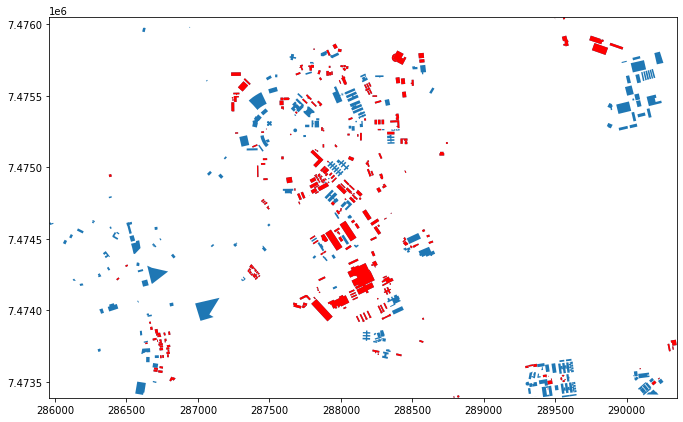

In [25]:
# ----- PLOT DE PREDIO DE ACORDO COM A BUSCA REALIZADA

ax = unicamp_utm_df.plot(figsize=(15, 7))
predio['geometry'].plot(ax=ax, color='Red')

# Para ampliar area mudar param. de set_xlim e set_ylim
minx, miny, maxx, maxy = unicamp_utm_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [26]:
# POSICIONAR LIXEIRAS EM LOCAIS PRÓXIMOS DOS PONTOS DE POSICIONAMENTO
# buracos no ciclo básico

# Desafios
# Sobreposição dos prédios
# Obter Altitudes da tabela
# Prédios faltantes no dataset